In [50]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy as sp
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

## 데이터 전처리 : 스포츠센터 회원파악

#### 1. 데이터 읽기

In [2]:
uselog = pd.read_csv('../../data/use_log.csv')
print(len(uselog))
uselog.head(2)

197428


,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01


In [3]:
uselog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   log_id       197428 non-null  object
 1   customer_id  197428 non-null  object
 2   usedate      197428 non-null  object
dtypes: object(3)
memory usage: 4.5+ MB


In [4]:
customer = pd.read_csv('../../data/customer_master2.csv')
print(len(customer))
customer.head(2)

4192


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0


In [5]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4192 non-null   object
 1   name         4192 non-null   object
 2   class        4192 non-null   object
 3   gender       4192 non-null   object
 4   start_date   4192 non-null   object
 5   end_date     1350 non-null   object
 6   campaign_id  4192 non-null   object
 7   is_deleted   4192 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 262.1+ KB


In [6]:
class_master = pd.read_csv('../../data/class_master.csv')
print(len(class_master))
class_master

3


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


In [7]:
class_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   class       3 non-null      object
 1   class_name  3 non-null      object
 2   price       3 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 204.0+ bytes


In [8]:
campaign_master = pd.read_csv('../../data/campaign_master.csv')
print(len(campaign_master))
campaign_master

3


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [9]:
campaign_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   campaign_id    3 non-null      object
 1   campaign_name  3 non-null      object
dtypes: object(2)
memory usage: 180.0+ bytes


#### 2. 고객 데이터 가공

In [10]:
## customer 와  class_master 를 결합
customer_join1 = pd.merge(customer, class_master, on="class", how="left")
customer_join1

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000
...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500


In [11]:
## customer_join1 과 campaign_master를 결합
customer_join2 = pd.merge(customer_join1, campaign_master, on="campaign_id", how="left")
customer_join2

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500,2_일반


In [12]:
customer_join2.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

#### 3. 고객 데이터 집계

In [13]:
###  회원권별 카운트
customer_join2.groupby("class_name").count()[["customer_id"]]

,customer_id
class_name,
0_종일,2045
1_주간,1019
2_야간,1128


In [14]:
###  캠패인별로 카운트
customer_join2.groupby("campaign_name").count()[["customer_id"]]

,customer_id
campaign_name,
0_입회비반액할인,650
1_입회비무료,492
2_일반,3050


In [15]:
### 회원권별 탈퇴한 인원수와 금액 합
customer_join2.groupby("class_name").sum()[["is_deleted","price"]]

,is_deleted,price
class_name,,
0_종일,664,21472500
1_주간,344,7642500
2_야간,342,6768000


In [16]:
### 성별 카운트
customer_join2.groupby("gender").count()[["customer_id"]]

,customer_id
gender,
F,1983
M,2209


In [17]:
### 성별, 캠페인네임별 카운트
customer_join2.groupby(["gender","campaign_name"]).count()[["customer_id"]]

customer_id
gender campaign_name             
F      0_입회비반액할인              286
       1_입회비무료                251
       2_일반                  1446
M      0_입회비반액할인              364
       1_입회비무료                241
       2_일반                  1604

In [18]:
### 성별, 클래스네임별 카운트
customer_join2.groupby(["gender", "class_name"]).count()[["customer_id"]]

customer_id
gender class_name             
F      0_종일                822
       1_주간                835
       2_야간                326
M      0_종일               1223
       1_주간                184
       2_야간                802

#### 4. 최근 고객 데이터

In [19]:
customer_join2["end_date"] = pd.to_datetime(customer_join2["end_date"])
customer_join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   object        
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 360.4+ KB


In [20]:
## 현재(2019.03.31)에 스포츠센터를 이용하는 회원 수
customer_new = customer_join2.loc[ (customer_join2["end_date"].isna() ) | (customer_join2["end_date"] > pd.to_datetime("20190331")) ]

customer_new

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaT,CA1,0,2_야간,6000,2_일반
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


In [21]:
### 캠페인네임별 카운트
customer_new.groupby("campaign_name").count()[["customer_id"]]

,customer_id
campaign_name,
0_입회비반액할인,282
1_입회비무료,219
2_일반,2341


In [22]:
### 캠페인네임별 카운트
customer_new.groupby("gender").count()[["customer_id"]]

,customer_id
gender,
F,1352
M,1490


In [23]:
### 탈퇴의사를 밝힌 인원 수

customer_new.groupby("is_deleted").count()[["customer_id"]]

,customer_id
is_deleted,
0,2842


#### 5. 이용 이력 데이터 집계

In [24]:
uselog["usedate"] = pd.to_datetime(uselog["usedate"])
uselog["년월"] = uselog["usedate"].dt.strftime("%Y%m")
uselog

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804
...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903
197424,L00000049209754,TS979550,2019-03-31,201903
197425,L00000049209755,TS995299,2019-03-31,201903
197426,L00000049209756,TS995853,2019-03-31,201903


In [25]:
uselog.groupby("년월").count()[['log_id']]

,log_id
년월,
201804,16460
201805,16913
201806,16994
201807,16954
201808,16674
201809,16471
201810,15989
201811,15697
201812,16383


In [26]:
uselog_months = uselog.groupby(["년월", "customer_id"], as_index=False).count()
uselog_months

,년월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [27]:
uselog_months.rename(columns={"usedate":"count"}, inplace=True)
uselog_months

,년월,customer_id,log_id,count
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [28]:
del uselog_months["log_id"]     # drop을 사용해도 된다
uselog_months

,년월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7
...,...,...,...
36837,201903,TS995853,8
36838,201903,TS998593,8
36839,201903,TS999079,3
36840,201903,TS999231,6


In [29]:
uselog_customer = uselog_months.groupby("customer_id")["count"].agg(["mean", "median", "max", "min" ])
uselog_customer = uselog_customer.reset_index(drop=False)
uselog_customer

,customer_id,mean,median,max,min
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4
...,...,...,...,...,...
4187,TS995853,9.500000,9.5,11,8
4188,TS998593,8.142857,8.0,9,7
4189,TS999079,4.916667,5.5,9,2
4190,TS999231,4.666667,5.0,8,1


#### 6. 이용 이력 데이터로 정기이용 여부 플래그 작성

In [30]:
uselog.head()

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [31]:
### 월요일~일요일 : 0~6

uselog["weekday"] = uselog["usedate"].dt.weekday
uselog

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6
...,...,...,...,...,...
197423,L00000049209753,TS977703,2019-03-31,201903,6
197424,L00000049209754,TS979550,2019-03-31,201903,6
197425,L00000049209755,TS995299,2019-03-31,201903,6
197426,L00000049209756,TS995853,2019-03-31,201903,6


In [32]:
uselog_weekday = uselog.groupby(["customer_id","년월","weekday"], as_index=False).count()[["customer_id","년월", "weekday","log_id"]]
uselog_weekday

,customer_id,년월,weekday,log_id
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
...,...,...,...,...
93328,TS999855,201901,1,1
93329,TS999855,201901,5,4
93330,TS999855,201901,6,1
93331,TS999855,201902,5,4


In [33]:
uselog_weekday.rename(columns={"log_id":"count"}, inplace=True)
uselog_weekday.head(30)

,customer_id,년월,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1
5,AS002855,201807,5,4
6,AS002855,201808,0,1
7,AS002855,201808,3,1
8,AS002855,201808,6,1
9,AS002855,201809,1,1


In [34]:
uselog_weekday = uselog_weekday.groupby("customer_id",as_index=False).max()[["customer_id", "count"]]
uselog_weekday

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [35]:
uselog_weekday["routine_flg"] = 0
uselog_weekday

,customer_id,count,routine_flg
0,AS002855,5,0
1,AS008805,4,0
2,AS009013,2,0
3,AS009373,5,0
4,AS015233,5,0
...,...,...,...
4187,TS995853,5,0
4188,TS998593,5,0
4189,TS999079,5,0
4190,TS999231,5,0


In [36]:
uselog_weekday.loc[uselog_weekday["count"] >= 4, "routine_flg"] = 1
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


#### 7. 고객 데이터와 이용이력 데이터를 결합

In [37]:
uselog_customer.head(2)

,customer_id,mean,median,max,min
0,AS002855,4.5,5.0,7,2
1,AS008805,4.0,4.0,8,1


In [38]:
customer_join2.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반


In [39]:
customer_join3 = pd.merge(customer_join2, uselog_customer, on="customer_id", how="left")
customer_join3.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3


In [43]:
customer_join4 = pd.merge(customer_join3,uselog_weekday[["customer_id", "routine_flg"]],on="customer_id", how="left")
customer_join4["start_date"]=pd.to_datetime(customer_join4["start_date"])
customer_join4.head(3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1


In [41]:
customer_join4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4192 entries, 0 to 4191
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   customer_id    4192 non-null   object        
 1   name           4192 non-null   object        
 2   class          4192 non-null   object        
 3   gender         4192 non-null   object        
 4   start_date     4192 non-null   datetime64[ns]
 5   end_date       1350 non-null   datetime64[ns]
 6   campaign_id    4192 non-null   object        
 7   is_deleted     4192 non-null   int64         
 8   class_name     4192 non-null   object        
 9   price          4192 non-null   int64         
 10  campaign_name  4192 non-null   object        
 11  mean           4192 non-null   float64       
 12  median         4192 non-null   float64       
 13  max            4192 non-null   int64         
 14  min            4192 non-null   int64         
 15  routine_flg    4192 n

#### 8. 회원 기간 계산

In [51]:
### relativedelta() 연습
a=relativedelta(pd.to_datetime("2025-06-26"), pd.to_datetime("2000-12-13"))
a

relativedelta(years=+24, months=+6, days=+13)

In [52]:
customer_join4["calc_date"] = customer_join4["end_date"]
customer_join4["calc_date"] = customer_join4["calc_date"].fillna(pd.to_datetime("20190331"))
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-03-31
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-03-31


In [54]:
customer_join4["membership"] = 0   ## 새로운 항목 만들고 0으로 초기화
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-03-31,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-03-31,0


In [55]:
for i in range(len(customer_join4)):
    delta = relativedelta( customer_join4.loc[i, "calc_date"], customer_join4.loc[i, "start_date"] )
    customer_join4.loc[i, "membership"] = delta.years*12 + delta.months    ## 개월 수 계산
    
customer_join4.head(2)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-03-31,46
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-03-31,46


In [56]:
customer_join4[1000:2001]

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,max,min,routine_flg,calc_date,membership
1000,HI390909,XXXXXX,C01,F,2016-09-01,NaT,CA1,0,0_종일,10500,2_일반,4.750000,5.0,7,2,1,2019-03-31,30
1001,OA829372,XXXX,C03,M,2016-09-01,NaT,CA1,0,2_야간,6000,2_일반,4.416667,4.0,7,2,1,2019-03-31,30
1002,IK616996,XXX,C01,M,2016-09-01,2018-05-31,CA1,1,0_종일,10500,2_일반,1.500000,1.5,2,1,0,2018-05-31,20
1003,IK478859,XXXX,C03,M,2016-09-01,NaT,CA1,0,2_야간,6000,2_일반,5.250000,5.0,8,3,1,2019-03-31,30
1004,PL844948,XX,C01,M,2016-09-01,NaT,CA1,0,0_종일,10500,2_일반,5.166667,5.0,8,3,1,2019-03-31,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,PL964421,XX,C01,M,2017-08-01,NaT,CA2,0,0_종일,10500,0_입회비반액할인,5.833333,6.0,9,3,1,2019-03-31,19
1997,HD475088,XXXXX,C01,F,2017-08-01,NaT,CA2,0,0_종일,10500,0_입회비반액할인,6.583333,6.5,9,4,1,2019-03-31,19
1998,HD089565,XX,C02,F,2017-08-01,2018-05-31,CA2,1,1_주간,7500,0_입회비반액할인,4.500000,4.5,5,4,1,2018-05-31,9
1999,HD809345,XXXX,C01,M,2017-08-01,NaT,CA2,0,0_종일,10500,0_입회비반액할인,6.416667,7.0,9,3,1,2019-03-31,19


#### 9. 각종 통계

In [57]:
customer_join4.groupby("routine_flg").count()[["customer_id"]]

,customer_id
routine_flg,
0,779
1,3413


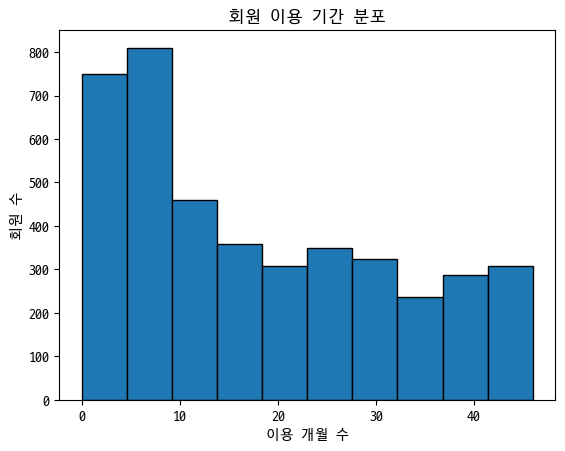

In [58]:
plt.hist(customer_join4["membership"], edgecolor='black')
plt.title("회원 이용 기간 분포")
plt.xlabel("이용 개월 수")
plt.ylabel("회원 수")
plt.show()

In [59]:
customer_end = customer_join4.loc[customer_join4["is_deleted"]==1]
customer_end.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership
count,1350,1350,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350,1350.000000
mean,2018-01-20 10:45:20,2018-10-17 16:23:28,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,2018-10-17 16:23:28,8.026667
min,2016-05-01 00:00:00,2018-04-30 00:00:00,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,2018-04-30 00:00:00,1.000000
25%,2017-10-01 00:00:00,2018-06-30 00:00:00,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,2018-06-30 00:00:00,4.000000
50%,2018-03-01 00:00:00,2018-10-31 00:00:00,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,2018-10-31 00:00:00,7.000000
75%,2018-06-03 00:00:00,2019-01-31 00:00:00,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,2019-01-31 00:00:00,11.000000
max,2019-02-11 00:00:00,2019-03-31 00:00:00,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,2019-03-31 00:00:00,23.000000
std,NaN,NaN,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,NaN,5.033692


In [60]:
customer_stay = customer_join4.loc[customer_join4["is_deleted"]==0]
customer_stay.describe()

,start_date,end_date,is_deleted,price,mean,median,max,min,routine_flg,calc_date,membership
count,2842,0,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842,2842.000000
mean,2017-04-03 22:42:28.627726848,NaT,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,2019-03-31 00:00:00,22.970443
min,2015-05-01 00:00:00,NaT,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,2019-03-31 00:00:00,0.000000
25%,2016-05-01 00:00:00,NaT,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,2019-03-31 00:00:00,11.000000
50%,2017-04-01 00:00:00,NaT,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,2019-03-31 00:00:00,23.000000
75%,2018-04-05 00:00:00,NaT,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,2019-03-31 00:00:00,34.000000
max,2019-03-15 00:00:00,NaT,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,2019-03-31 00:00:00,46.000000
std,NaN,NaN,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,NaN,13.746761


In [61]:
## 다른 프로그램에서 이용 가능하도록 결과를 csv파일로 저장

customer_join4.to_csv("../../data/customer_join4.csv", index=False)